In [49]:
import numpy as np
import pandas as pd

import random
import timeit

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks", color_codes=True)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn import neighbors

from sklearn.metrics import accuracy_score

In [2]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("../input/wine-quality/wineQualityReds.csv")
#Loading Data set
wine_w = pd.read_csv("../input/wine-quality/wineQualityWhites.csv")                                                                                                                           #a new object with copy of objects data nd indices.
wine_w = wine_w.iloc[:,1:]
wine_r = wine_r.iloc[:,1:]

wine_w[C]= np.zeros(wine_w.shape[0])                                                                                                                          #returns a new array of given shape and size filled with zeros
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])
wine.columns = DLC

In [3]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0.0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0.0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0.0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0.0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1.0


Text(0.5, 1.0, 'UnNormalized')

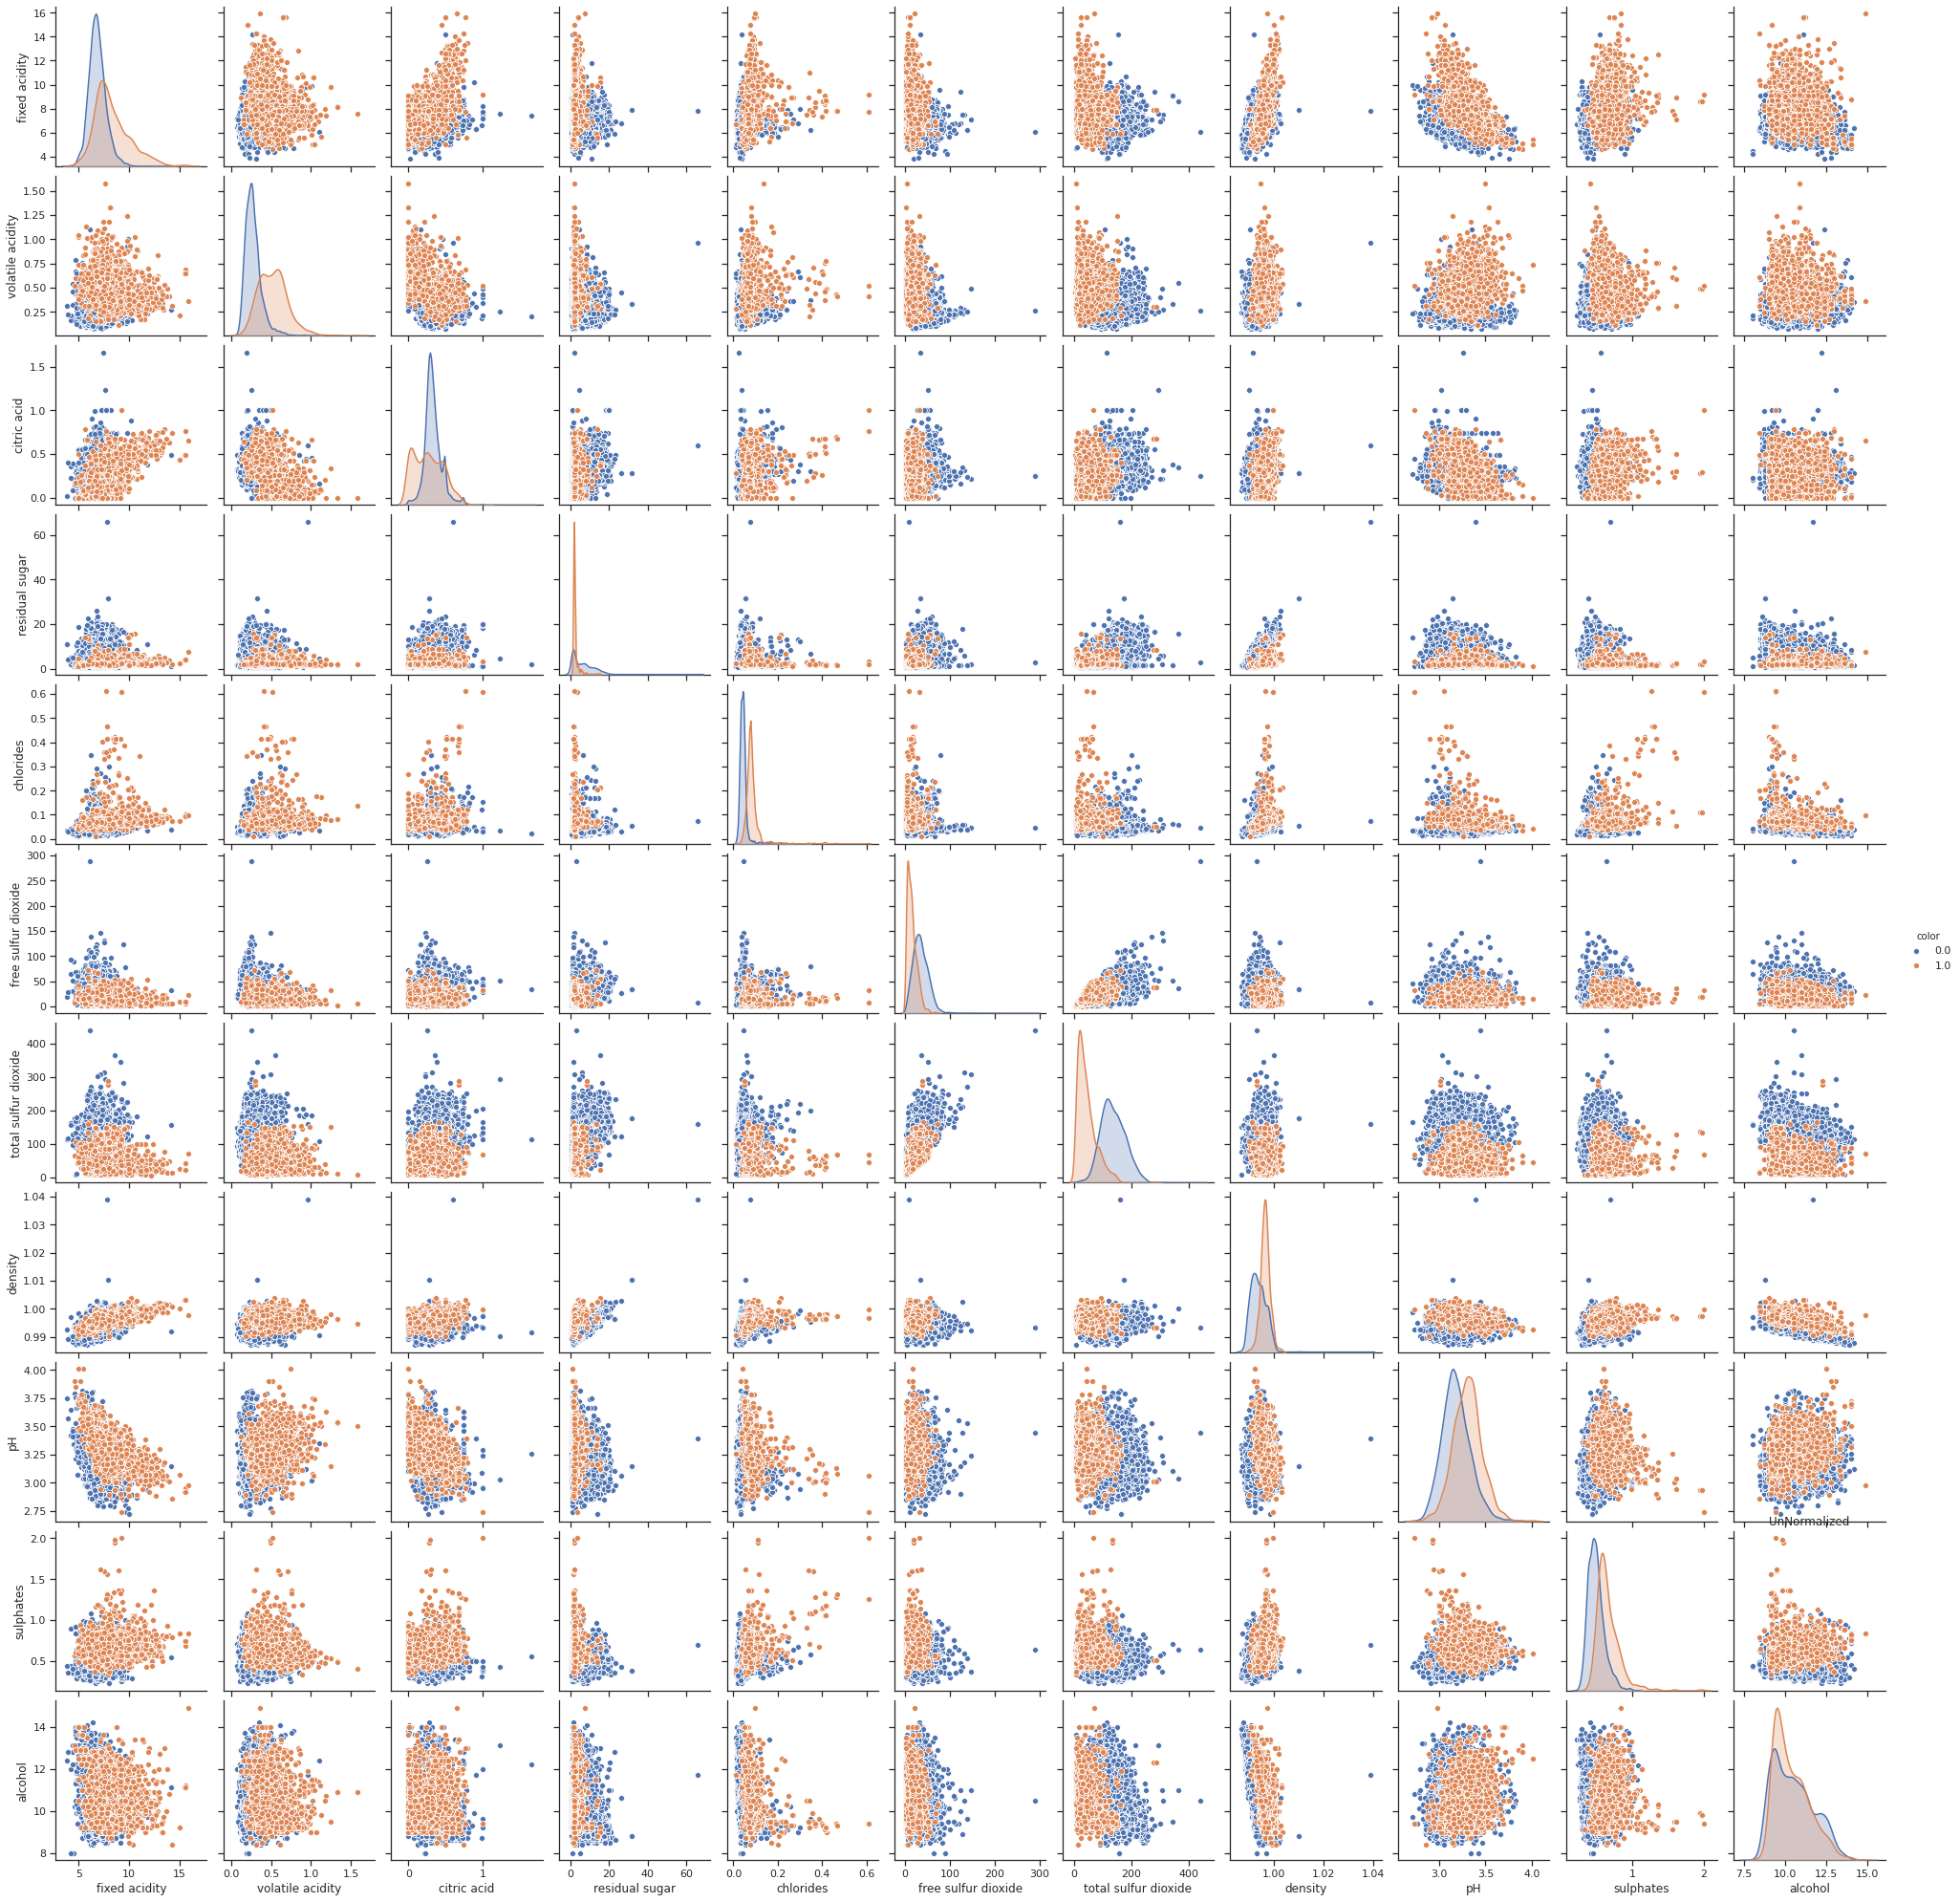

In [4]:
sns.pairplot(wine,vars=wine[D],hue="color")
plt.title("UnNormalized")

In [7]:
#wine_normalized=StandardScaler().fit_transform(wine[D])
# returns numpy array

wine_normalized_for_pairplot=((wine-wine.mean())/wine.std())#normalizing whole dataset. This can also be done using StandardScaler().
wine_normalized_for_pairplot['color']=wine['color'] #replacing color and quality 
wine_normalized_for_pairplot['quality']=wine['quality']

Text(0.5, 1.0, 'Normalized')

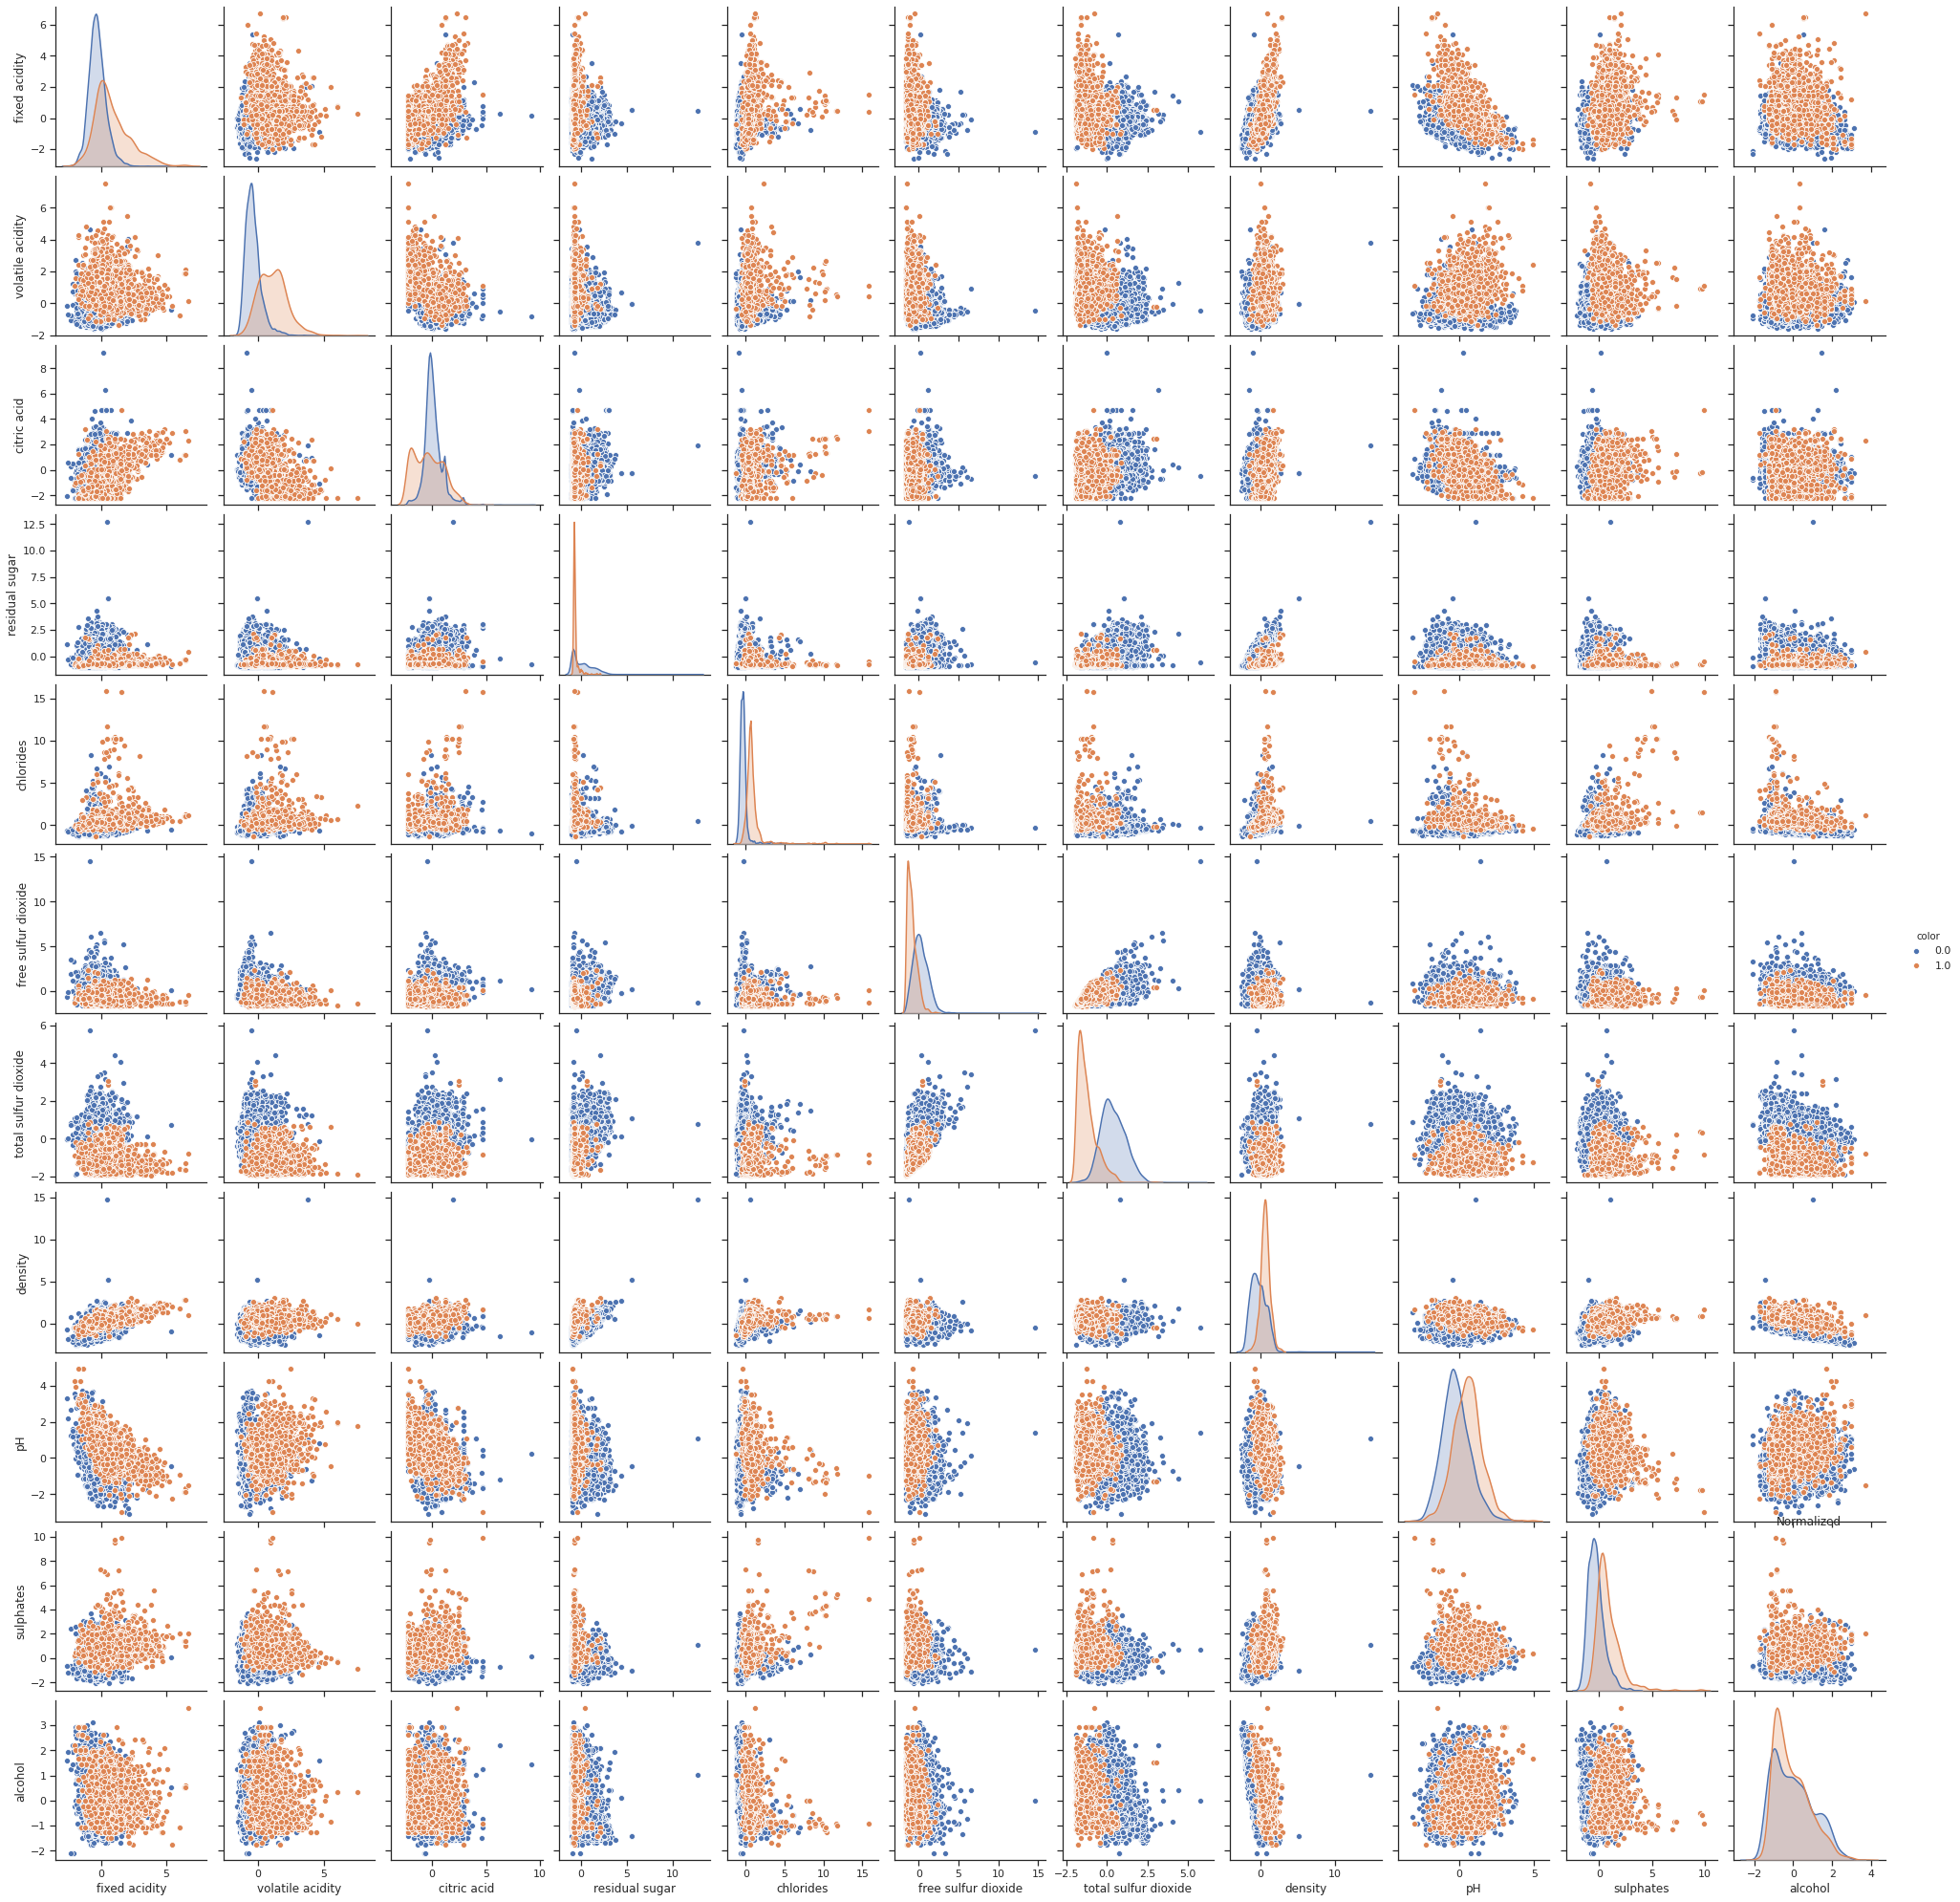

In [8]:
sns.pairplot(wine_normalized_for_pairplot,vars=wine_normalized_for_pairplot[D],hue="color")
plt.title("Normalized")

In [9]:
print(wine.mean())
print("\t\t\n\n\n\n \t\t\tSTD")
print(wine.std())

fixed acidity             7.215307
volatile acidity          0.339666
citric acid               0.318633
residual sugar            5.443235
chlorides                 0.056034
free sulfur dioxide      30.525319
total sulfur dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
quality                   5.818378
color                     0.246114
dtype: float64
		



 			STD
fixed acidity            1.296434
volatile acidity         0.164636
citric acid              0.145318
residual sugar           4.757804
chlorides                0.035034
free sulfur dioxide     17.749400
total sulfur dioxide    56.521855
density                  0.002999
pH                       0.160787
sulphates                0.148806
alcohol                  1.192712
quality                  0.873255
color                    0.430779
dtype: float64


In [10]:
print(wine_normalized_for_pairplot.mean())
print("\n\n Standard Deviation\n\n")
print(wine_normalized_for_pairplot.std())

fixed acidity           9.426335e-15
volatile acidity       -2.682491e-15
citric acid             2.983593e-14
residual sugar         -3.354977e-15
chlorides              -6.889107e-15
free sulfur dioxide    -1.210787e-15
total sulfur dioxide    4.524966e-17
density                 1.736770e-12
pH                      2.660711e-14
sulphates              -8.569890e-15
alcohol                -4.778225e-14
quality                 5.818378e+00
color                   2.461136e-01
dtype: float64


 Standard Deviation


fixed acidity           1.000000
volatile acidity        1.000000
citric acid             1.000000
residual sugar          1.000000
chlorides               1.000000
free sulfur dioxide     1.000000
total sulfur dioxide    1.000000
density                 1.000000
pH                      1.000000
sulphates               1.000000
alcohol                 1.000000
quality                 0.873255
color                   0.430779
dtype: float64


### We have done standardization. 

Normalization vs. Standardization
The terms normalization and standardization are sometimes used interchangeably, but they usually refer to different things. Normalization usually means to scale a variable to have a values between 0 and 1, while standardization transforms data to have a mean of zero and a standard deviation of 1. This standardization is called a z-score, and data points can be standardized with the following formula:

### ANALYSIS::-
Standardization Technique:: z-score
wine_normalized=((wine-wine.mean())/wine.std())

Need of Normalization::
Data is normalized so that all the features are on the same scale and one feature doesn't end up dominating others due to the variations in the scale when we try to fit the data into a model. The z-scores have a distribution with a mean of 0 and a standard deviation of 1.

Pair Plots::
1) Unnormalized pair plots :
It can be clearly seen that the scales for various features are varying hugely viz.

chlorides: max val: 0.6 i.e small variations in the data should have larger effect on the model during classification.

total sulfur dioxide: max val: 400 i.e small variations in the data should have little effect on the model during classification.

2) Normalized pair plots :
Z score normalization has scaled the data points to a common scale ranging between -2 and 15 with 0 mean and s.d as 1.

chlorides: max val: 15

total sulfur dioxide: max val: 6

Now, all the features in the dataset will have the equalized dominance with respect to units when classification is done.

Density feature::
Density when plotted with other features in unnormalized pairplot can been seen less separable and having overlapped data points for class 0 and class 1 of label "color". Whereas, the density when plotted with other features after normalization over a scale of 0-15 is separating the datapoints very clearly.

Note:Correlation wise feature-feature analysis is given in feature selection section
Citations:
1.https://statistics.laerd.com/statistical-guides/standard-score-2.php

2.https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca



### Feature Scaling

If some variables have a large variance and some small, PCA (maximizing variance) will load on the large variances. For example if you change one variable from km to cm (increasing its variance), it may go from having little impact to dominating the first principle component. If you want your PCA to be independent of such rescaling, standardizing the variables will do that. On the other hand, if the specific scale of your variables matters (in that you want your PCA to be in that scale), maybe you don't want to standardize. 

Normalization is important in PCA since it is a variance maximizing exercise. It projects your original data onto directions which maximize the variance.

In [11]:
X=wine[D]
y=wine[C]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

ss=StandardScaler()
wine_normalized_X_train=ss.fit_transform(X_train)

#normalizing train set. This can also be done using StandardScaler() or z score or fit_transform and transform for test_data.
wine_normalized_X_test=ss.transform(X_test)
X_train = wine_normalized_X_train
X_test = wine_normalized_X_test

In [12]:
start = timeit.default_timer()

n_neighborslist = list(range(1,51))
col_names=['uniform','distance_manhattan','distance_euclidean']
accarray = np.zeros((len(n_neighborslist),3))
#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray,index=n_neighborslist, columns=col_names) 
# I have taken index as neighbor_list to avaoid '0' in the first row which affects the mean accuracy of the various methods.
# As a response, I have also changed the plotting syntax from row 1 to row 0.
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0],p=2)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,col_names[0]] = accscore 
    
    neigh1 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=1)
    neigh1.fit(X_train, y_train)
    y_pred1 = neigh1.predict(X_test)
    accscore1 = accuracy_score(y_test, y_pred1)
    acc.at[k,col_names[1]] = accscore1   
    
    neigh2 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=2)
    neigh2.fit(X_train, y_train)
    y_pred2 = neigh2.predict(X_test)
    accscore2 = accuracy_score(y_test, y_pred2)
    acc.at[k,col_names[2]] = accscore2
    
    
stop = timeit.default_timer()
print('Time KNN: ', stop - start)

Timetaken = pd.DataFrame(columns = ['Model', 'time'])
Timetaken = Timetaken.append({'Model':' KNN', 'time':stop-start},ignore_index=True)

Time KNN:  18.80201207799996


In [13]:
Timetaken

,Model,time
0,KNN,18.802012


In [14]:
acc

,uniform,distance_manhattan,distance_euclidean
1,0.993846,0.995385,0.993846
2,0.993846,0.995385,0.993846
3,0.995385,0.995385,0.996154
4,0.994615,0.996154,0.995385
5,0.991538,0.996154,0.993846
6,0.993077,0.994615,0.993846
7,0.992308,0.994615,0.993846
8,0.992308,0.995385,0.993846
9,0.992308,0.996154,0.993846
10,0.991538,0.996154,0.994615


In [15]:
neigh = neighbors.KNeighborsClassifier(n_neighbors=1,weights=col_names[0],p=2)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)


neigh1 = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance',p=1)
neigh1.fit(X_train, y_train)
y_pred1 = neigh1.predict(X_test)

    
neigh2 = neighbors.KNeighborsClassifier(n_neighbors=6, weights='distance',p=2)
neigh2.fit(X_train, y_train)
y_pred2 = neigh2.predict(X_test)

In [16]:
a=pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
b=pd.crosstab(y_test, y_pred1, rownames=['True'], colnames=['Predicted'], margins=True)
c=pd.crosstab(y_test, y_pred2, rownames=['True'], colnames=['Predicted'], margins=True)

In [17]:
print("CONFUSION MATRIX || UNIFORM EUCLIDEAN || K=1")
a

CONFUSION MATRIX || UNIFORM EUCLIDEAN || K=1


Predicted,0.0,1.0,All
True,,,
0.0,984,2,986
1.0,6,308,314
All,990,310,1300


In [18]:
print("CONFUSION MATRIX || DISTANCE MANHATTAN || K=5")
b

CONFUSION MATRIX || DISTANCE MANHATTAN || K=5


Predicted,0.0,1.0,All
True,,,
0.0,985,1,986
1.0,4,310,314
All,989,311,1300


In [19]:
print("CONFUSION MATRIX || DISTANCE EUCLIDEAN || K=6")
c

CONFUSION MATRIX || DISTANCE EUCLIDEAN || K=6


Predicted,0.0,1.0,All
True,,,
0.0,982,4,986
1.0,4,310,314
All,986,314,1300


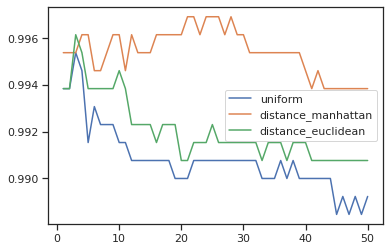

In [20]:
acc[:].plot.line()

# Feature selection

### - Pearson correlation coefficient

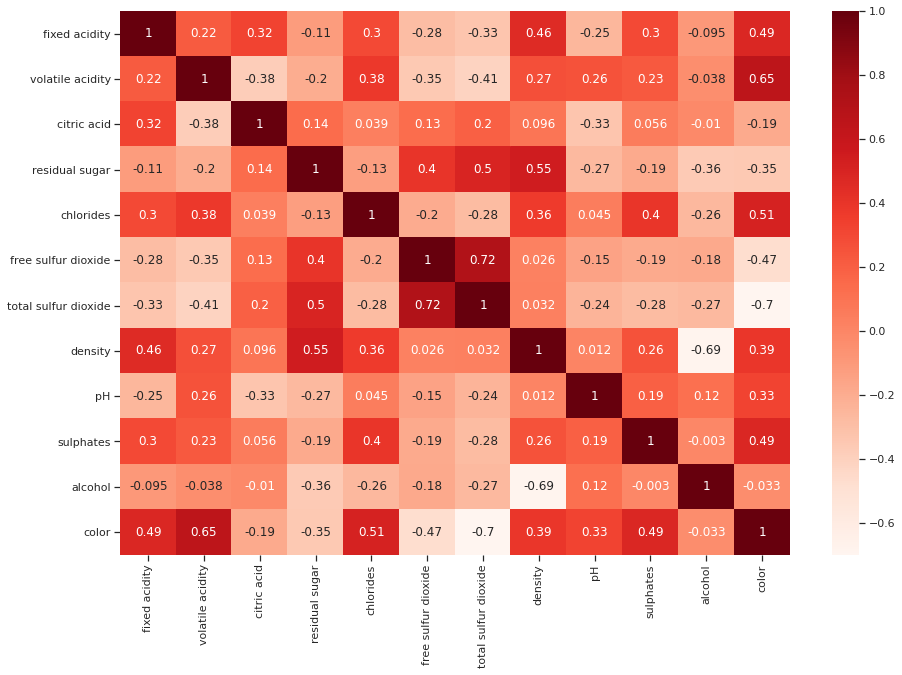

In [21]:
#Using Pearson Correlation on unnormalized data set
plt.figure(figsize=(15,10))
#finding corr between various features including color leavig quality out.
corr = wine[DC].corr()
#plotting on heatmap
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)

In [22]:
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.487218


In [23]:
corr['color']

fixed acidity           0.486740
volatile acidity        0.653036
citric acid            -0.187397
residual sugar         -0.348821
chlorides               0.512678
free sulfur dioxide    -0.471644
total sulfur dioxide   -0.700357
density                 0.390645
pH                      0.329129
sulphates               0.487218
alcohol                -0.032970
color                   1.000000
Name: color, dtype: float64

In [24]:
#making all features correlation absolute wrt color 
cor_target = abs(corr['color'])     # taking absolute value because there is a correlation no matter positive or negative.
#Selecting highly correlated features
highly_correlated_features = cor_target[cor_target>0.48]
highly_correlated_features

fixed acidity           0.486740
volatile acidity        0.653036
chlorides               0.512678
total sulfur dioxide    0.700357
sulphates               0.487218
color                   1.000000
Name: color, dtype: float64

In [25]:
# Finding correlation between these points. It should be less than 0.5. It is our threshold.

wine[["total sulfur dioxide","chlorides","volatile acidity","sulphates","density"]].corr()


,total sulfur dioxide,chlorides,volatile acidity,sulphates,density
total sulfur dioxide,1.000000,-0.279630,-0.414476,-0.275727,0.032395
chlorides,-0.279630,1.000000,0.377124,0.395593,0.362615
volatile acidity,-0.414476,0.377124,1.000000,0.225984,0.271296
sulphates,-0.275727,0.395593,0.225984,1.000000,0.259478
density,0.032395,0.362615,0.271296,0.259478,1.000000


Result :Pearson correlation coefficient for feature selection leaves us with feature set :-[total sulfur dioxide ,volatile acidity ,chlorides,sulphates] showing good correlation with color. Each showing corr more than 0.48 with label "color".


### - Extra Trees classifier

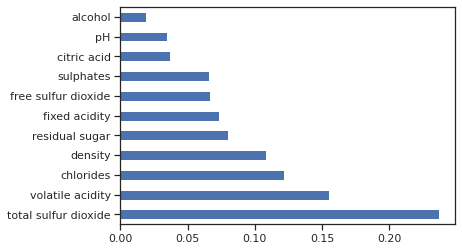

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier()
X=wine[D]
y=wine[C]
classifier.fit(X,y)
imp_fea = pd.Series(classifier.feature_importances_, index=X.columns)
imp_fea.nlargest(15).plot(kind='barh')

In [27]:
imp_fea

fixed acidity           0.073440
volatile acidity        0.155176
citric acid             0.036808
residual sugar          0.080033
chlorides               0.122091
free sulfur dioxide     0.066960
total sulfur dioxide    0.237163
density                 0.108153
pH                      0.034724
sulphates               0.066037
alcohol                 0.019414
dtype: float64

RESULT :: Extras Trees Classifier for feature importance leaves us with feature set :-[total sulfur dioxide ,volatile acidity ,chlorides,density] having the highest importance with respect to label "color".


### - Random Forest classifier

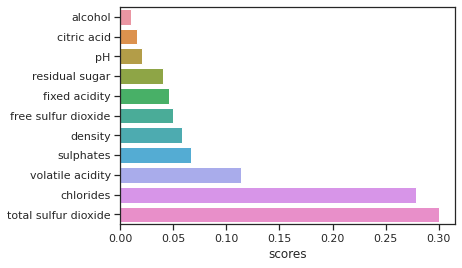

In [28]:
from sklearn.ensemble import RandomForestClassifier
X=wine[D]
y=wine[C]
model_fea_imp = RandomForestClassifier().fit(X, y).feature_importances_
cols=list(wine[D].columns)
fea_scores = pd.DataFrame({'scores':model_fea_imp}, index=cols).sort_values('scores')
sns.barplot(fea_scores['scores'], fea_scores.index)

In [29]:
fea_scores

,scores
alcohol,0.010216
citric acid,0.015248
pH,0.020197
residual sugar,0.040026
fixed acidity,0.046148
free sulfur dioxide,0.049471
density,0.058019
sulphates,0.067071
volatile acidity,0.114035
chlorides,0.279033


RandomForest Classifier for feature importance leaves us with feature set :-[total sulfur dioxide ,chlorides,volatile acidity,density] having the highest importance with respect to label "color".

In [30]:
selectedfea=wine[['total sulfur dioxide','chlorides','volatile acidity','density']]
selectedfea

,total sulfur dioxide,chlorides,volatile acidity,density
0,170.0,0.045,0.270,1.00100
1,132.0,0.049,0.300,0.99400
2,97.0,0.050,0.280,0.99510
3,186.0,0.058,0.230,0.99560
4,186.0,0.058,0.230,0.99560
...,...,...,...,...
1594,44.0,0.090,0.600,0.99490
1595,51.0,0.062,0.550,0.99512
1596,40.0,0.076,0.510,0.99574
1597,44.0,0.075,0.645,0.99547


In [31]:
X_train,X_test, y_train, y_test = train_test_split(selectedfea, wine[C], test_size=0.2, random_state = 42)

In [32]:
n_neighborslist = list(range(1,51))
col_names=['uniform','distance_manhattan','distance_euclidean']
accarray = np.zeros((len(n_neighborslist),3))
#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray,index=n_neighborslist, columns=col_names) 
# I have taken index as neighbor_list to avaoid '0' in the first row which affects the mean accuracy of the various methods.
# As a response, I have also changed the plotting syntax from row 1 to row 0.

for k in n_neighborslist:
    neigh4 = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0],p=2)
    neigh4.fit(X_train, y_train)
    y_pred = neigh4.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,col_names[0]] = accscore  
    
    neigh5 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=1)
    neigh5.fit(X_train, y_train)
    y_pred1 = neigh5.predict(X_test)
    accscore1 = accuracy_score(y_test, y_pred1)
    acc.at[k,col_names[1]] = accscore1   
    
    neigh6 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=2)
    neigh6.fit(X_train, y_train)
    y_pred2 = neigh6.predict(X_test)
    accscore2 = accuracy_score(y_test, y_pred2)
    acc.at[k,col_names[2]] = accscore2

In [33]:
acc.describe()

,uniform,distance_manhattan,distance_euclidean
count,50.000000,50.000000,50.000000
mean,0.927154,0.954462,0.951723
std,0.008933,0.005742,0.006182
min,0.918462,0.948462,0.944615
25%,0.920000,0.950192,0.947115
50%,0.925385,0.953077,0.950000
75%,0.929231,0.955385,0.954615
max,0.965385,0.970769,0.965385


WE FIND OUT HERE, THAT THE HIGHEST ACCURACY AND MEAN ACCURACY GIVEN BY THE 4 SELECTED FEATURES IS MORE THAN THAT OF ALL THE FEATURES, WHEN KNN CLASSIFICATION IS DONE.
selected features=[['total sulfur dioxide','chlorides','volatile acidity','density']].

- For feature selection:

    - Highest correlation of feature with the label.
    - Least correlation with between the features.
    
    
## Ex:

### Feature Discussion/ Analysis
##### In short:
- Least correlation can be found between [Alcohol and sulphates].
- Highest correlation can be found between [Free sulfur dioxide and Total sulfur dioxide]

#### Relationship between the features can be explored by multiple ways. It is hard to analyze the pair plots directly when the number of dimensions and the data points are large. SO, I have compared the features using correlation between the features and the correaltion between features and the class label.

## Detailed accuracy comparison:

#### Relationship between features T.S.D and Volatile acidity : Highest corelation with class label

1. Both the features are highly corelated to label "color"

2. I have ignored feature to feature corelation.

3. Approximate Accuracy :94-95%

#### Relationship between features T.S.D and sulphates : High corelation with class label for T.S.D and sulphate is less corelated to T.S.D.

1. T.S.D is highly corelated to label "color" whereas sulphate is 4th most correlated with color.

2. Both are less corelated to each other.

3. Approximate Accuracy :93%

#### Relationship between features Alcohol and sulphates:least corelated features

1. No corealtion with color taken into account.

2. Both are least corelated to each other.

3. Approximate Accuracy :88%

#### Relationship between features T.S.D and chlorides : Top 2 corelated features by RandomForest as well..

1. T.S.D is highly corelated with color. chlorides is 3rd most corelated to color.

2. Both are less corelated to each other.

3. Approximate Accuracy :97.15-97.55%

#### Thus, we can get the highest accuracy and separability for the classes when both the feature-feature and feature to class corelations are taken into account. Feature-feature corelation should be minimum as it leads to overfitting and the feature to class corelation should be maximum. The corelation can also be found by symmetrical uncertainty.
We can calculate symmetric uncertainty for correlation between features and class label and then add the features with S.U higher than 0.5 to a list of best features and then perform the S.U between the selected feature pairs.
Lets say : S(best)=[p,q] are the two best features with highest Symmetric uncertainty with the class. Then we can find the S.U between S.U(p,q) features.
If S.U(p,q)>S.U(q,class) then drop feature q.


#### Implementation: https://github.com/kannavdhawan/Dataset-analysis-and-classification/blob/master/classification.ipynb

# Feature generation- PCA LDA

### - PCA(ALL COMPONENTS)--> KNN --> 3 WEIGHTS||NORMALIZED DATA ||LABEL:COLOR


In [34]:
start = timeit.default_timer()

pca_normalized=PCA(random_state=42)
pca_train_data=pca_normalized.fit_transform(wine_normalized_X_train) 
pca_test_data=pca_normalized.transform(wine_normalized_X_test)

n_neighborslist = list(range(1,51))
col_names=['uniform','distance_manhattan','distance_euclidean']
accarray = np.zeros((len(n_neighborslist),3))
#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray,index=n_neighborslist, columns=col_names) 
# I have taken index as neighbor_list to avaoid '0' in the first row which affects the mean accuracy of the various methods.
# As a response, I have also changed the plotting syntax from row 1 to row 0.

for k in n_neighborslist:
    neigh7 = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0],p=2)
    neigh7.fit(pca_train_data, y_train)
    y_pred = neigh7.predict(pca_test_data)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,col_names[0]] = accscore
    
    neigh8 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=1)
    neigh8.fit(pca_train_data, y_train)
    y_pred1 = neigh8.predict(pca_test_data)
    accscore1 = accuracy_score(y_test, y_pred1)
    acc.at[k,col_names[1]] = accscore1    
    
    neigh9 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=2)
    neigh9.fit(pca_train_data, y_train)
    y_pred2 = neigh9.predict(pca_test_data)
    accscore2 = accuracy_score(y_test, y_pred2)
    acc.at[k,col_names[2]] = accscore2
    
stop = timeit.default_timer()
print('Time PCA KNN NORMALIZED: ', stop - start)

Timetaken = Timetaken.append({'Model':'PCA KNN NORMALIZED', 'time':stop-start},ignore_index=True)


Time PCA KNN NORMALIZED:  16.885938310999904


In [35]:
acc

,uniform,distance_manhattan,distance_euclidean
1,0.993846,0.994615,0.993846
2,0.993846,0.994615,0.993846
3,0.995385,0.993846,0.996154
4,0.994615,0.994615,0.995385
5,0.991538,0.994615,0.993846
6,0.993077,0.993846,0.993846
7,0.992308,0.993846,0.993846
8,0.992308,0.993077,0.993846
9,0.992308,0.993846,0.993846
10,0.991538,0.992308,0.994615


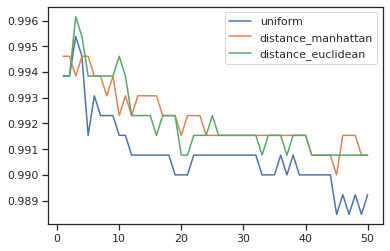

In [36]:
acc[:].plot.line()

### - LDA(ALL COMPONENTS)--> KNN --> 3 WEIGHTS||NORMALIZED DATA ||LABEL:COLOR


In [ ]:
start = timeit.default_timer()

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_normalized = LDA()
lda_transformed_train=lda_normalized.fit_transform(wine_normalized_X_train, y_train) #feature reduced to 1 
lda_transformed_test=lda_normalized.transform(wine_normalized_X_test) # same but separately  # also tested for same .
# lda_with_label=pd.concat([lda_tranformed1,wine_normalized[C]],axis=1)
#it separated the data class wise.

n_neighborslist = list(range(1,51))
col_names=['uniform','distance_manhattan','distance_euclidean']
accarray = np.zeros((len(n_neighborslist),3))
#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray,index=n_neighborslist, columns=col_names) 
# I have taken index as neighbor_list to avaoid '0' in the first row which affects the mean accuracy of the various methods.
# As a response, I have also changed the plotting syntax from row 1 to row 0.

for k in n_neighborslist:
    neigh10 = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0],p=2)
    neigh10.fit(lda_transformed_train, y_train)
    y_pred = neigh10.predict(lda_transformed_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,col_names[0]] = accscore

    neigh11 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=1)
    neigh11.fit(lda_transformed_train, y_train)
    y_pred1 = neigh11.predict(lda_transformed_test)
    accscore1 = accuracy_score(y_test, y_pred1)
    acc.at[k,col_names[1]] = accscore1    
    
    neigh12 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=2)
    neigh12.fit(lda_transformed_train, y_train)
    y_pred2 = neigh12.predict(lda_transformed_test)
    accscore2 = accuracy_score(y_test, y_pred2)
    acc.at[k,col_names[2]] = accscore2
    
stop = timeit.default_timer()
print('Time LDA KNN NORMALIZED: ', stop - start)

Timetaken = Timetaken.append({'Model':'LDA KNN NORMALIZED', 'time':stop-start},ignore_index=True)


In [37]:
acc

,uniform,distance_manhattan,distance_euclidean
1,0.993846,0.994615,0.993846
2,0.993846,0.994615,0.993846
3,0.995385,0.993846,0.996154
4,0.994615,0.994615,0.995385
5,0.991538,0.994615,0.993846
6,0.993077,0.993846,0.993846
7,0.992308,0.993846,0.993846
8,0.992308,0.993077,0.993846
9,0.992308,0.993846,0.993846
10,0.991538,0.992308,0.994615


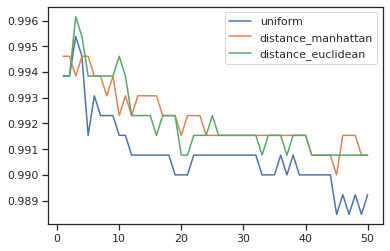

In [38]:
acc[:].plot.line()

# PAIR PLOTS | PCA & LDA | COLOR & QUALITY AS LABEL

In [6]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0.0
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0.0
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0.0
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0.0
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1.0


In [39]:
X_train,X_test,y_train,y_test = train_test_split(wine[D],wine[C],test_size=0.2)
sd = StandardScaler()
X_train = sd.fit_transform(X_train)
X_test = sd.transform(X_test)



In [40]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [41]:
n_neighborslist = list(range(1,51))
col_names=['uniform','distance_manhattan','distance_euclidean']
accarray = np.zeros((len(n_neighborslist),3))
#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray,index=n_neighborslist, columns=col_names) 
# I have taken index as neighbor_list to avaoid '0' in the first row which affects the mean accuracy of the various methods.
# As a response, I have also changed the plotting syntax from row 1 to row 0.

for k in n_neighborslist:
    neigh13 = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0],p=2)
    neigh13.fit(X_train, y_train)
    y_pred = neigh13.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,col_names[0]] = accscore
    
    neigh14 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=1)
    neigh14.fit(X_train, y_train)
    y_pred1 = neigh14.predict(X_test)
    accscore1 = accuracy_score(y_test, y_pred1)
    acc.at[k,col_names[1]] = accscore1    
    
    neigh15 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=2)
    neigh15.fit(X_train, y_train)
    y_pred2 = neigh15.predict(X_test)
    accscore2 = accuracy_score(y_test, y_pred2)
    acc.at[k,col_names[2]] = accscore2
stop = timeit.default_timer()
print('Time PCA KNN UNNORMALIZED : ', stop - start)

Timetaken=Timetaken.append({'Model':'PCA KNN UNNORMALIZED ', 'time':stop-start},ignore_index=True)

p=pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
q=pd.crosstab(y_test, y_pred1, rownames=['True'], colnames=['Predicted'], margins=True)
r=pd.crosstab(y_test, y_pred2, rownames=['True'], colnames=['Predicted'], margins=True)
print(p,"\n\n")
print(q,"\n\n")
print(r)

Time PCA KNN UNNORMALIZED :  363.31499785200003
Predicted  0.0  1.0   All
True                     
0.0        984    2   986
1.0          2  312   314
All        986  314  1300 


Predicted  0.0  1.0   All
True                     
0.0        983    3   986
1.0          3  311   314
All        986  314  1300 


Predicted  0.0  1.0   All
True                     
0.0        984    2   986
1.0          2  312   314
All        986  314  1300


In [42]:
acc

,uniform,distance_manhattan,distance_euclidean
1,0.996154,0.996154,0.996154
2,0.995385,0.996154,0.996154
3,0.995385,0.996154,0.996154
4,0.996154,0.996923,0.996923
5,0.996923,0.996154,0.996154
6,0.997692,0.996154,0.996923
7,0.996923,0.996154,0.996154
8,0.997692,0.996923,0.996923
9,0.997692,0.995385,0.996923
10,0.997692,0.996154,0.996923


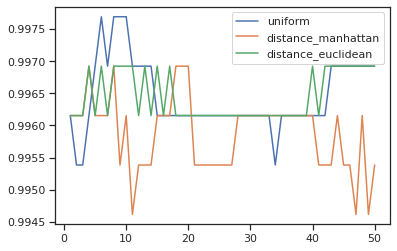

In [43]:
acc[:].plot.line()

### pair plot

In [44]:
X_train.shape

(5197, 11)

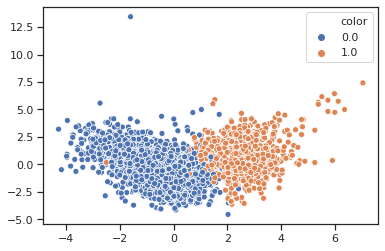

In [47]:
sns.scatterplot(X_train[:,0],X_train[:,1],hue=y_train)

# LDA

In [50]:
X_train,X_test,y_train,y_test = train_test_split(wine[D],wine[C],test_size=0.2)
sd = StandardScaler()
X_train = sd.fit_transform(X_train)
X_test = sd.transform(X_test)

lda = LDA()
X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)

In [51]:
X_train.shape   # n-1

(5197, 1)

In [52]:
n_neighborslist = list(range(1,51))
col_names=['uniform','distance_manhattan','distance_euclidean']
accarray = np.zeros((len(n_neighborslist),3))
#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray,index=n_neighborslist, columns=col_names) 
# I have taken index as neighbor_list to avaoid '0' in the first row which affects the mean accuracy of the various methods.
# As a response, I have also changed the plotting syntax from row 1 to row 0.

for k in n_neighborslist:
    neigh16 = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0],p=2)
    neigh16.fit(X_train, y_train)
    y_pred = neigh16.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,col_names[0]] = accscore

    neigh17 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=1)
    neigh17.fit(X_train, y_train)
    y_pred1 = neigh17.predict(X_test)
    accscore1 = accuracy_score(y_test, y_pred1)
    acc.at[k,col_names[1]] = accscore1    
    
    neigh18 = neighbors.KNeighborsClassifier(n_neighbors=k, weights='distance',p=2)
    neigh18.fit(X_train, y_train)
    y_pred2 = neigh18.predict(X_test)
    accscore2 = accuracy_score(y_test, y_pred2)
    acc.at[k,col_names[2]] = accscore2

stop = timeit.default_timer()
print('Time LDA KNN UNNORMALIZED: ', stop - start)

Timetaken=Timetaken.append({'Model':'LDA KNN UNNORMALIZED', 'time':stop-start},ignore_index=True)

    
s=pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
t=pd.crosstab(y_test, y_pred1, rownames=['True'], colnames=['Predicted'], margins=True)
u=pd.crosstab(y_test, y_pred2, rownames=['True'], colnames=['Predicted'], margins=True)
print(s,"\n\n")
print(t,"\n\n")
print(u)

Time LDA KNN UNNORMALIZED:  526.340697848
Predicted  0.0  1.0   All
True                     
0.0        955    6   961
1.0          7  332   339
All        962  338  1300 


Predicted  0.0  1.0   All
True                     
0.0        956    5   961
1.0          9  330   339
All        965  335  1300 


Predicted  0.0  1.0   All
True                     
0.0        956    5   961
1.0          9  330   339
All        965  335  1300


In [53]:
acc

,uniform,distance_manhattan,distance_euclidean
1,0.988462,0.988462,0.988462
2,0.987692,0.989231,0.989231
3,0.988462,0.987692,0.987692
4,0.987692,0.987692,0.987692
5,0.990000,0.987692,0.987692
6,0.990000,0.987692,0.987692
7,0.990000,0.987692,0.987692
8,0.990769,0.988462,0.988462
9,0.990000,0.988462,0.988462
10,0.990769,0.989231,0.989231


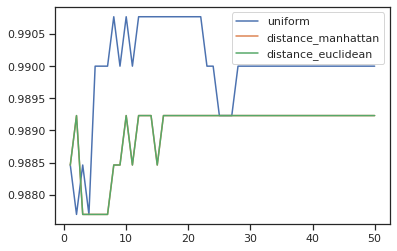

In [54]:
acc[:].plot.line()